# Algerian Forest Fires Dataset Data Set

##### Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

 - The period from June 2012 to September 2012.
 - The dataset includes 11 attribues and 1 output attribue (class)
 - The 244 instances have been classified into a "fire™ (138 classes) and a "not fire" (106 classes) classes.

##### Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
###### Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
###### FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely "Fire" and "not Fire"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

### Data reading from the csv file

In [2]:
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

### Top 5 Records

In [3]:
dataset.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


#### Shape of the dataset

In [4]:
dataset.shape

(246, 14)

##### Summary of the dataset

In [5]:
dataset.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


##### Check Datatypes in the dataset

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


So from the data information the data divided into two regions the first 122 is Bejaia region located in the northeast of Algeria and the rest data is Sidi Bel-abbes region located in the northwest of Algeria.

so looking the dataset surrounding the row 122 

In [7]:
dataset.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


so from the row number 122 the Sidi-Bel Abbes Region Dataset is starting so droping the 122 and 123 row and separating the data based on the region so adding new column to the dataset

In [8]:
dataset.drop([122,123], inplace=True)
dataset.reset_index(drop=True,inplace= True)

dataset.loc[:122, 'region'] = 'bejaia'
dataset.loc[122:, 'region'] = 'Sidi-Bel Abbes'

dataset.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,bejaia
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,bejaia
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,Sidi-Bel Abbes
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,Sidi-Bel Abbes
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,Sidi-Bel Abbes


#### Getting categorical datas

In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 0 numerical features : []

We have 15 categorical features : ['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region']


#### Some of the columns names are having unwanted spaces so removing it

In [10]:
# Stripping the names of the columns

dataset.columns = [i.strip() for i in dataset.columns]
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [11]:
# Stripping the Classes Features data

dataset.Classes = dataset.Classes.str.strip()
dataset['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

### Converting column w.r.t it's data and analysing it with target column

in 15 categorical columns almost all columns have numeric values except last two columns.\
so converting frist 13 columns to folat

##### analysing day column

In [12]:
dataset['day'].unique()
# there is not any unusuall data present at the column

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [13]:
dataset['day'].value_counts()

01    8
17    8
30    8
29    8
28    8
27    8
26    8
25    8
24    8
23    8
22    8
21    8
20    8
19    8
18    8
16    8
02    8
15    8
14    8
13    8
12    8
11    8
10    8
09    8
08    8
07    8
06    8
05    8
04    8
03    8
31    4
Name: day, dtype: int64

In [14]:
# converting day column to int
dataset['day']=dataset['day'].astype(int)

pd.DataFrame(dataset['day'].groupby(dataset['Classes']).count())

,day
Classes,
fire,137
not fire,106


In [15]:
pd.DataFrame(dataset['Classes'].groupby(dataset['day']).value_counts())

Classes
day Classes          
1   not fire        8
2   not fire        6
    fire            2
3   not fire        5
    fire            3
4   not fire        5
    fire            3
5   fire            5
    not fire        3
6   fire            5
    not fire        3
7   fire            5
    not fire        3
8   fire            5
    not fire        3
9   fire            4
    not fire        4
10  not fire        5
    fire            3
11  fire            4
    not fire        4
12  fire            5
    not fire        3
13  fire            4
    not fire        4
14  not fire        4
    fire            3
15  fire            4
    not fire        4
16  fire            4
    not fire        4
17  fire            6
    not fire        2
18  fire            6
    not fire        2
19  fire            6
    not fire        2
20  fire            5
    not fire        3
21  fire            8
22  fire            4
    not fire        4
23  fire            5
    not fire        3
24  fire            4
    not fire        4
25  fire            5
    not fire        3
26  fire            6
    not fire        2
27  fire            6
    not fire        2
28  fire            5
    not fire        3
29  fire            5
    not fire        3
30  fire            4
    not fire        4
31  fire            3
    not fire        1

<AxesSubplot:xlabel='Classes', ylabel='day'>

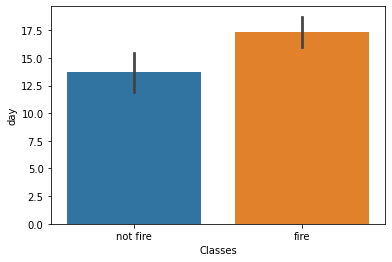

In [16]:
sns.barplot(data= dataset, x= 'Classes', y= 'day')

<AxesSubplot:xlabel='Classes', ylabel='day'>

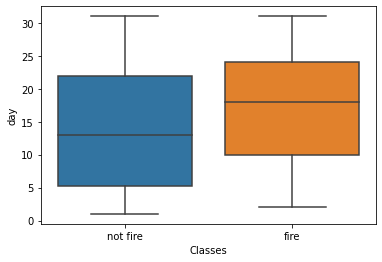

In [17]:
sns.boxplot(data = dataset, x='Classes', y='day')

<AxesSubplot:xlabel='Classes', ylabel='day'>

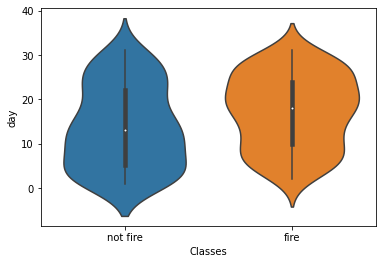

In [18]:
sns.violinplot(data = dataset, x='Classes', y='day')

<AxesSubplot:xlabel='Classes', ylabel='day'>

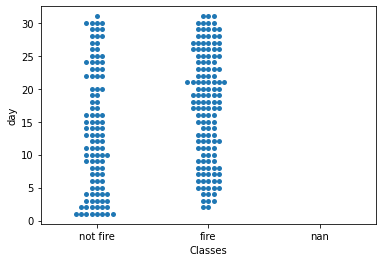

In [19]:
sns.swarmplot(data = dataset, x='Classes', y='day')

<AxesSubplot:xlabel='Classes', ylabel='day'>

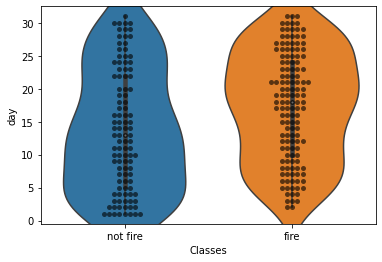

In [20]:
sns.violinplot(data = dataset, x='Classes', y='day')
sns.swarmplot(data = dataset, x='Classes', y='day', color = 'k', alpha = 0.6)

<AxesSubplot:xlabel='Classes', ylabel='day'>

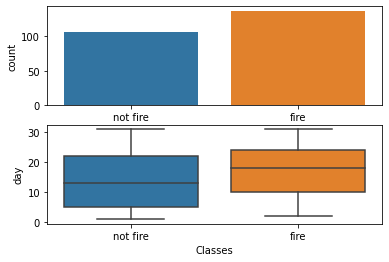

In [21]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = dataset, x = 'Classes', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = dataset, x='Classes', y='day' , ax = ax2)

**By observing above data the fire had more counts and on 21st had most time of fire**

##### analysing month column

In [22]:
# getting number of months
dataset['month'].value_counts()

07    62
08    62
06    60
09    60
Name: month, dtype: int64

In [23]:
# getting unique values
dataset['month'].unique()

array(['06', '07', '08', '09'], dtype=object)

In [24]:
# converting month column to int
dataset['month']=dataset['month'].astype(int)

pd.DataFrame(dataset['Classes'].groupby(dataset['month']).value_counts())

Classes
month Classes          
6     not fire       35
      fire           25
7     fire           38
      not fire       23
8     fire           51
      not fire       11
9     not fire       37
      fire           23

<AxesSubplot:xlabel='Classes', ylabel='month'>

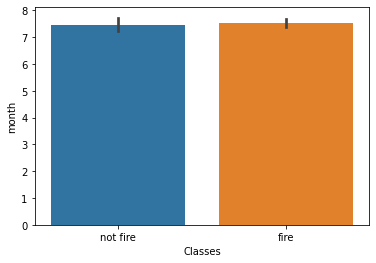

In [25]:
sns.barplot(data= dataset, x= 'Classes', y= 'month')

<AxesSubplot:xlabel='Classes', ylabel='month'>

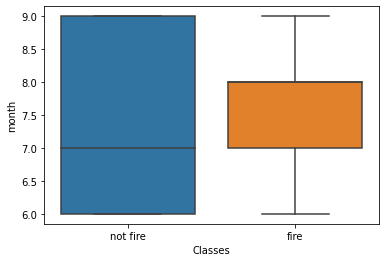

In [26]:
sns.boxplot(data= dataset, x= 'Classes', y= 'month')

<AxesSubplot:xlabel='Classes', ylabel='month'>

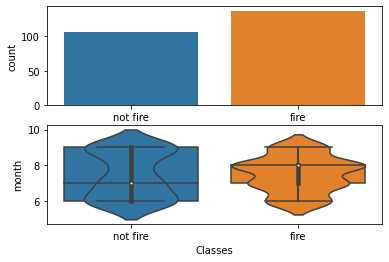

In [27]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = dataset, x = 'Classes', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = dataset, x='Classes', y='month' , ax = ax2)
sns.violinplot(data = dataset, x='Classes', y='month' , ax = ax2)

<AxesSubplot:xlabel='Classes', ylabel='month'>

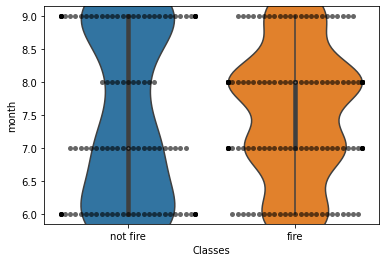

In [28]:
sns.violinplot(data = dataset, x='Classes', y='month')
sns.swarmplot(data = dataset, x='Classes', y='month', color = 'k', alpha = 0.6)

**By watching all above graphs and stats in 8th(Aug) month the fire incidents are more and low in 6th(Jun) month**

###### Analysing year column

In [29]:
dataset['year'].value_counts()

2012    244
Name: year, dtype: int64

In [30]:
# converting year column to int
dataset['year']=dataset['year'].astype(int)

pd.DataFrame(dataset[['month','Classes']].groupby(dataset['year']).value_counts())

0
year month Classes     
2012 8     fire      51
     7     fire      38
     9     not fire  37
     6     not fire  35
           fire      25
     7     not fire  23
     9     fire      23
     8     not fire  11

**The only one year present**

##### Analysing Temperature column

In [31]:
dataset['Temperature'].value_counts()

35    29
31    25
34    24
33    23
30    22
32    21
36    21
29    18
28    15
37     9
27     8
25     6
39     6
26     5
24     3
38     3
40     3
22     2
42     1
Name: Temperature, dtype: int64

In [32]:
dataset['Temperature'].unique()

array(['29', '26', '25', '27', '31', '33', '30', '28', '32', '34', '35',
       '36', '37', '22', '24', '38', '39', '40', '42'], dtype=object)

In [33]:
# converting Temperature column to int
dataset['Temperature']=dataset['Temperature'].astype(int)

pd.DataFrame(dataset['Classes'].groupby(dataset['Temperature']).value_counts())

Classes
Temperature Classes          
22          not fire        2
24          not fire        3
25          not fire        6
26          not fire        4
            fire            1
27          not fire        7
            fire            1
28          not fire       12
            fire            3
29          not fire       13
            fire            5
30          not fire       15
            fire            7
31          fire           16
            not fire        9
32          fire           12
            not fire        9
33          fire           15
            not fire        8
34          fire           16
            not fire        8
35          fire           22
            not fire        7
36          fire           20
            not fire        1
37          fire            8
38          fire            2
            not fire        1
39          fire            5
            not fire        1
40          fire            3
42          fire            1

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

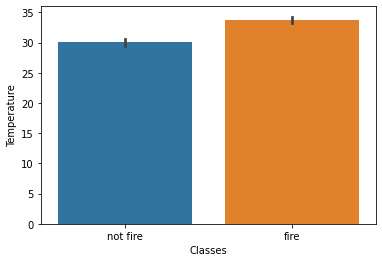

In [34]:
sns.barplot(data= dataset, x= 'Classes', y= 'Temperature')

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

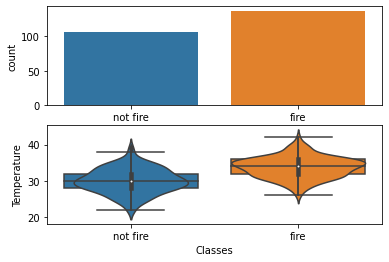

In [35]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = dataset, x = 'Classes', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = dataset, x='Classes', y='Temperature' , ax = ax2)
sns.violinplot(data = dataset, x='Classes', y='Temperature' , ax = ax2)

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

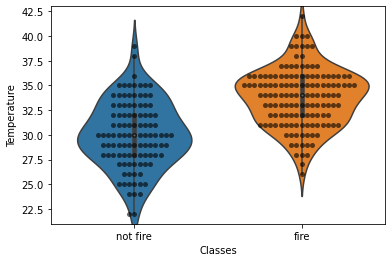

In [36]:
sns.violinplot(data = dataset, x='Classes', y='Temperature')
sns.swarmplot(data = dataset, x='Classes', y='Temperature', color = 'k', alpha = 0.6)

**At 35 degree celcius the more fire insidents occured and above 25 degree temprature have occured fire**

#### Analysing RH columns

In [37]:
dataset['RH'].value_counts()

64    10
55    10
58     8
54     8
78     8
      ..
21     1
90     1
24     1
38     1
26     1
Name: RH, Length: 62, dtype: int64

In [38]:
# converting RH column to int
dataset['RH']=dataset['RH'].astype(int)

In [39]:
pd.DataFrame(dataset['Classes'].groupby(dataset['RH']).value_counts())

Classes
RH Classes          
21 fire            1
24 fire            1
26 fire            1
29 fire            1
31 fire            1
...              ...
87 not fire        4
88 not fire        2
   fire            1
89 not fire        3
90 not fire        1

[99 rows x 1 columns]

<AxesSubplot:>

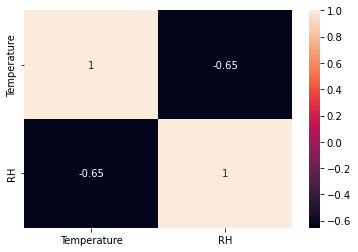

In [40]:
sns.heatmap(dataset[['Temperature', 'RH']].corr(), annot=True)

<AxesSubplot:xlabel='Classes', ylabel='RH'>

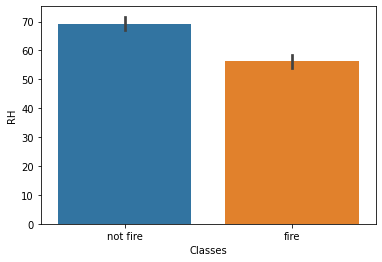

In [41]:
sns.barplot(data= dataset, x= 'Classes', y= 'RH')

<AxesSubplot:xlabel='Classes', ylabel='RH'>

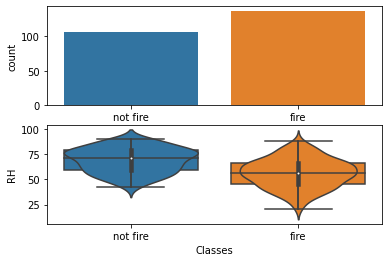

In [42]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = dataset, x = 'Classes', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = dataset, x='Classes', y='RH' , ax = ax2)
sns.violinplot(data = dataset, x='Classes', y='RH' , ax = ax2)

<AxesSubplot:xlabel='Classes', ylabel='RH'>

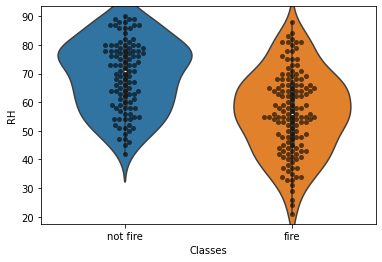

In [43]:
sns.violinplot(data = dataset, x='Classes', y='RH')
sns.swarmplot(data = dataset, x='Classes', y='RH', color = 'k', alpha = 0.6)

**In between 50 to 60% of the humidity caused more fire incidents**

##### analysing wind speed (Ws) column

In [44]:
dataset['Ws'].value_counts()

14    43
15    40
13    30
17    28
16    27
18    26
19    15
21     8
11     7
12     7
10     3
9      2
20     2
22     2
26     1
8      1
6      1
29     1
Name: Ws, dtype: int64

In [45]:
# converting Ws column to int
dataset['Ws']=dataset['Ws'].astype(int)

In [46]:
pd.DataFrame(dataset['Classes'].groupby(dataset['Ws']).value_counts())

Classes
Ws Classes          
6  not fire        1
8  fire            1
9  fire            1
   not fire        1
10 not fire        2
   fire            1
11 fire            5
   not fire        2
12 not fire        5
   fire            2
13 fire           17
   not fire       13
14 fire           24
   not fire       19
15 fire           25
   not fire       15
16 fire           17
   not fire       10
17 fire           17
   not fire       11
18 fire           17
   not fire        8
19 fire            8
   not fire        7
20 not fire        2
21 not fire        6
   fire            2
22 not fire        2
26 not fire        1
29 not fire        1

<AxesSubplot:>

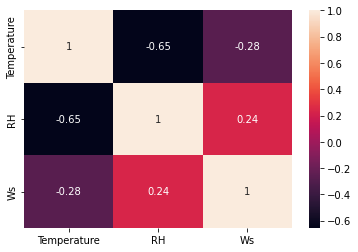

In [47]:
sns.heatmap(dataset[['Temperature', 'RH','Ws']].corr(), annot=True)

<AxesSubplot:xlabel='Classes', ylabel='Ws'>

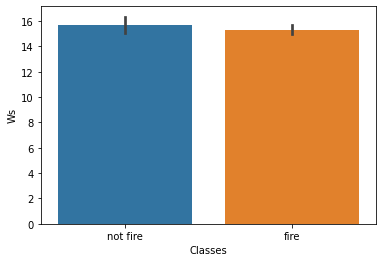

In [48]:
sns.barplot(data= dataset, x= 'Classes', y= 'Ws')

<AxesSubplot:xlabel='Classes', ylabel='Ws'>

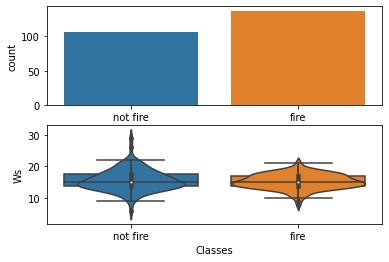

In [49]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = dataset, x = 'Classes', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = dataset, x='Classes', y='Ws' , ax = ax2)
sns.violinplot(data = dataset, x='Classes', y='Ws' , ax = ax2)

<AxesSubplot:xlabel='Classes', ylabel='Ws'>

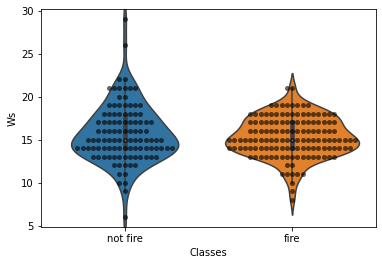

In [50]:
sns.violinplot(data = dataset, x='Classes', y='Ws')
sns.swarmplot(data = dataset, x='Classes', y='Ws', color = 'k', alpha = 0.6)

**According to data when the wind speed is about 15 then about 25 fire incidents occured**

#### Analysing the Rain column

In [51]:
dataset['Rain'].value_counts()

0       133
0.1      18
0.2      12
0.3      10
0.4       8
0.7       6
0.6       6
0.5       5
1.1       3
1.2       3
2         3
1.8       3
0.8       2
2.9       2
1.3       2
3.8       2
1.4       2
1         2
3.1       2
16.8      1
4.5       1
6.5       1
4.1       1
13.1      1
1.9       1
6         1
2.2       1
1.7       1
2.5       1
4.7       1
8.7       1
7.2       1
4         1
5.8       1
8.3       1
4.6       1
0.9       1
10.1      1
4.4       1
Name: Rain, dtype: int64

In [52]:
# converting Rain column to int
dataset['Rain']=dataset['Rain'].astype(float)

In [53]:
pd.DataFrame(dataset['Classes'].groupby(dataset['Rain']).value_counts())

Classes
Rain Classes          
0.0  fire          114
     not fire       19
0.1  fire            9
     not fire        9
0.2  not fire        8
     fire            3
0.3  not fire        6
     fire            4
0.4  not fire        7
     fire            1
0.5  not fire        3
     fire            2
0.6  not fire        4
     fire            2
0.7  not fire        6
0.8  not fire        2
0.9  not fire        1
1.0  not fire        2
1.1  not fire        3
1.2  not fire        3
1.3  not fire        2
1.4  not fire        2
1.7  not fire        1
1.8  not fire        3
1.9  fire            1
2.0  not fire        3
2.2  not fire        1
2.5  not fire        1
2.9  not fire        2
3.1  not fire        2
3.8  not fire        2
4.0  not fire        1
4.1  not fire        1
4.4  not fire        1
4.5  not fire        1
4.6  not fire        1
4.7  not fire        1
5.8  not fire        1
6.0  fire            1
6.5  not fire        1
7.2  not fire        1
8.3  not fire        1
8.7  not fire        1
10.1 not fire        1
13.1 not fire        1
16.8 not fire        1

<AxesSubplot:xlabel='Classes', ylabel='Rain'>

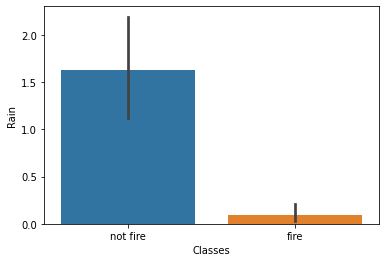

In [54]:
sns.barplot(data= dataset, x= 'Classes', y= 'Rain')

<AxesSubplot:xlabel='Classes', ylabel='Rain'>

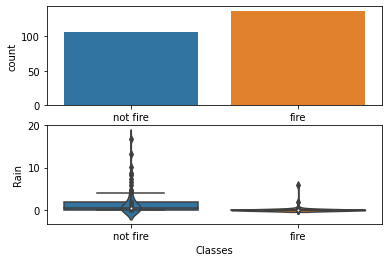

In [55]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = dataset, x = 'Classes', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = dataset, x='Classes', y='Rain' , ax = ax2)
sns.violinplot(data = dataset, x='Classes', y='Rain' , ax = ax2)

<AxesSubplot:xlabel='Classes', ylabel='Rain'>

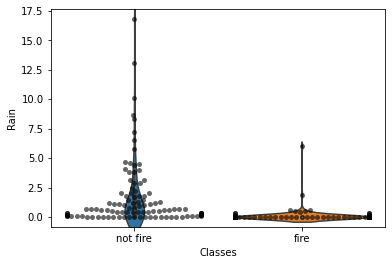

In [56]:
sns.violinplot(data = dataset, x='Classes', y='Rain')
sns.swarmplot(data = dataset, x='Classes', y='Rain', color = 'k', alpha = 0.6)

**When there is no rain then the fire incidents are more other than that only once or twice the fire is there**

#### Analysing FFMC columns

In [57]:
dataset['FFMC'].value_counts()

88.9    8
89.4    5
89.3    4
85.4    4
89.1    4
       ..
82.4    1
81.3    1
86.4    1
76.6    1
67.3    1
Name: FFMC, Length: 173, dtype: int64

In [58]:
dataset['FFMC'].unique()

array(['65.7', '64.4', '47.1', '28.6', '64.8', '82.6', '88.2', '86.6',
       '52.9', '73.2', '84.5', '84', '50', '59', '49.4', '36.1', '37.3',
       '56.9', '79.9', '59.8', '81', '79.1', '81.4', '85.9', '86.7',
       '86.8', '89', '89.1', '88.7', '59.9', '55.7', '63.1', '80.1', '87',
       '80', '85.6', '66.6', '81.1', '75.1', '81.8', '73.9', '60.7',
       '72.6', '82.8', '85.4', '88.1', '73.4', '68.2', '70', '84.3',
       '89.2', '90.3', '86.5', '87.2', '78.8', '78', '76.6', '85', '86.4',
       '77.1', '87.4', '88.9', '81.3', '82.4', '80.2', '89.3', '89.4',
       '88.3', '88.6', '89.5', '85.8', '84.9', '90.1', '72.7', '52.5',
       '46', '30.5', '42.6', '68.4', '80.8', '75.8', '69.6', '62', '56.1',
       '58.5', '71', '40.9', '47.4', '44.9', '78.1', '87.7', '83.8',
       '87.8', '77.8', '73.7', '68.3', '48.6', '82', '85.7', '77.5', '45',
       '57.1', '48.7', '79.4', '83.7', '71.4', '90.6', '72.3', '53.4',
       '66.8', '62.2', '65.5', '64.6', '60.2', '86.2', '78.3', '74.

In [59]:
# converting FFMC column to int
dataset['FFMC']=dataset['FFMC'].astype(float)

In [60]:
pd.DataFrame(dataset['Classes'].groupby(dataset['FFMC']).value_counts())

,,Classes
FFMC,Classes,
28.6,not fire,1
30.5,not fire,1
36.1,not fire,1
37.3,not fire,1
37.9,not fire,1
...,...,...
93.8,fire,1
93.9,fire,2
94.2,fire,1


<AxesSubplot:xlabel='Classes', ylabel='FFMC'>

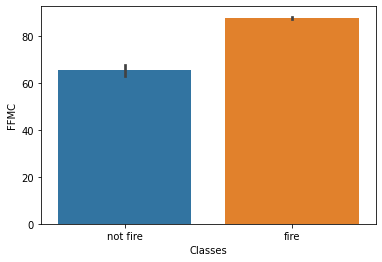

In [61]:
sns.barplot(data= dataset, x= 'Classes', y= 'FFMC')

<AxesSubplot:xlabel='Classes', ylabel='FFMC'>

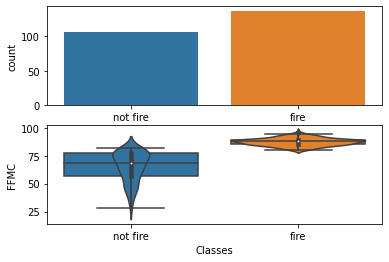

In [62]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = dataset, x = 'Classes', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = dataset, x='Classes', y='FFMC' , ax = ax2)
sns.violinplot(data = dataset, x='Classes', y='FFMC' , ax = ax2)

<AxesSubplot:xlabel='Classes', ylabel='FFMC'>

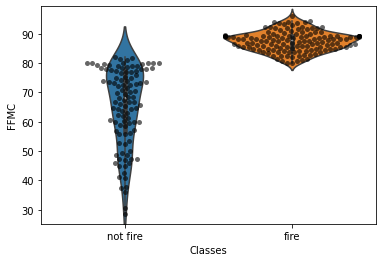

In [63]:
sns.violinplot(data = dataset, x='Classes', y='FFMC')
sns.swarmplot(data = dataset, x='Classes', y='FFMC', color = 'k', alpha = 0.6)

**Higher the FFMC higher the fire incidents**

#### Analysing DMC column

In [64]:
dataset['DMC'].value_counts()

7.9     5
12.5    4
1.9     4
3.4     3
4.6     3
       ..
10.9    1
2.1     1
3.6     1
1.2     1
4.3     1
Name: DMC, Length: 166, dtype: int64

In [65]:
dataset['DMC'].unique()

array(['3.4', '4.1', '2.5', '1.3', '3', '5.8', '9.9', '12.1', '7.9',
       '9.5', '12.5', '13.8', '6.7', '4.6', '1.7', '1.1', '1.9', '4.5',
       '6.3', '7', '8.2', '11.2', '14.2', '17.8', '21.6', '25.5', '18.4',
       '22.9', '2.4', '2.6', '7.6', '10.9', '9.7', '7.7', '6', '8.1',
       '7.8', '5.2', '9.4', '12', '12.3', '18.5', '16.4', '10.5', '9.6',
       '17.1', '22.2', '24.4', '26.7', '28.5', '31.9', '4.8', '5.7',
       '11.1', '13', '15.5', '11.3', '14.8', '18.6', '21.7', '15.6', '19',
       '11.7', '16', '20', '23.2', '25.9', '29.6', '33.5', '37.6', '40.5',
       '43.9', '45.6', '47', '50.2', '54.2', '25.2', '8.7', '0.7', '1.2',
       '3.6', '3.2', '2.1', '2.2', '0.9', '6.4', '9.8', '13.5', '16.5',
       '10.6', '5.5', '8.3', '7.1', '2.9', '2.7', '8.4', '8.5', '13.3',
       '18.2', '21.3', '11.4', '7.2', '4.2', '3.9', '4.4', '3.8', '10',
       '12.8', '20.9', '27.2', '17.9', '13.6', '18.7', '8', '12.6',
       '12.9', '18', '19.4', '21.1', '23.9', '27.8', '32.7', '39.

In [66]:
dataset['DMC'] = dataset['DMC'].astype(float)

In [67]:
pd.DataFrame(dataset['Classes'].groupby(dataset['DMC']).value_counts())

,,Classes
DMC,Classes,
0.7,not fire,1
0.9,not fire,2
1.1,not fire,2
1.2,not fire,1
1.3,not fire,3
...,...,...
51.3,fire,1
54.2,fire,1
56.3,fire,1


<AxesSubplot:xlabel='Classes', ylabel='DMC'>

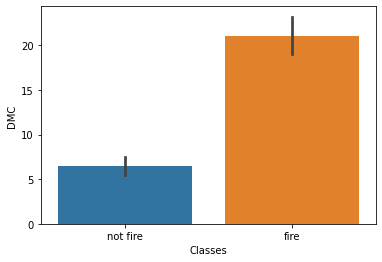

In [68]:
sns.barplot(data= dataset, x= 'Classes', y= 'DMC')

<AxesSubplot:xlabel='Classes', ylabel='DMC'>

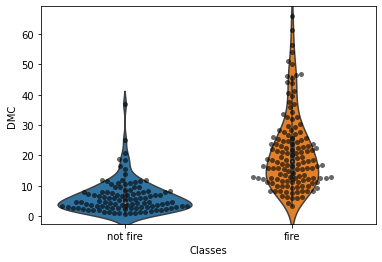

In [69]:
sns.violinplot(data = dataset, x='Classes', y='DMC')
sns.swarmplot(data = dataset, x='Classes', y='DMC', color = 'k', alpha = 0.6)

**Higher the DMC value higher the chances of fire**

#### Analysing DC column

In [70]:
dataset['DC'].value_counts()

8        5
7.6      4
7.8      4
8.4      4
7.5      4
        ..
90.4     1
100.7    1
110.9    1
120.9    1
16.5     1
Name: DC, Length: 198, dtype: int64

In [71]:
dataset['DC'].unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '8.2', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5',
       '

Some DC values have inappropriate spaces in between values so removing it

In [72]:
dataset['DC'] = dataset["DC"].replace("14.6 9","14.69")

In [73]:
dataset['DC'].unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '8.2', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5',
       '

In [74]:
dataset['DC'] = dataset['DC'].astype(float)

In [75]:
pd.DataFrame(dataset['Classes'].groupby(dataset['DC']).value_counts())

,,Classes
DC,Classes,
6.9,not fire,1
7.0,not fire,2
7.1,not fire,1
7.3,not fire,2
7.4,not fire,2
...,...,...
181.3,fire,1
190.6,fire,1
200.2,fire,1


<AxesSubplot:xlabel='Classes', ylabel='DC'>

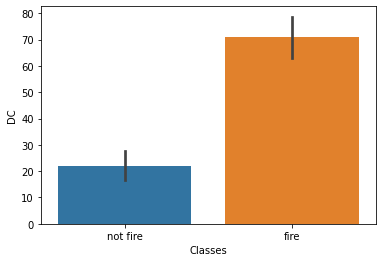

In [76]:
sns.barplot(data= dataset, x= 'Classes', y= 'DC')

<AxesSubplot:xlabel='Classes', ylabel='DC'>

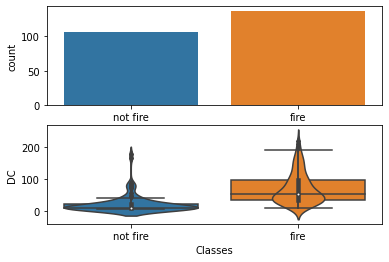

In [77]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = dataset, x = 'Classes', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = dataset, x='Classes', y='DC' , ax = ax2)
sns.violinplot(data = dataset, x='Classes', y='DC' , ax = ax2)

<AxesSubplot:xlabel='Classes', ylabel='DC'>

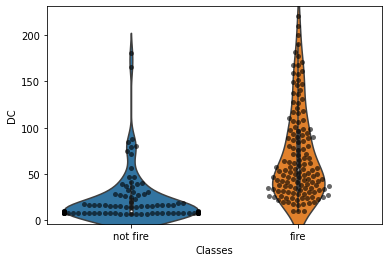

In [78]:
sns.violinplot(data = dataset, x='Classes', y='DC')
sns.swarmplot(data = dataset, x='Classes', y='DC', color = 'k', alpha = 0.6)

**When the DC value is high chances of fire is also high beacuse it indicates the moistures in the land**

#### Analysing FWI Fire Behavior Indices

 - ISI
 - BUI
 - FWI

In [79]:
dataset['ISI'].value_counts()

1.1     8
1.2     7
0.4     5
4.7     5
5.2     5
       ..
11.3    1
7.6     1
4.1     1
9.9     1
11.2    1
Name: ISI, Length: 106, dtype: int64

In [80]:
dataset['ISI'].unique()

array(['1.3', '1', '0.3', '0', '1.2', '3.1', '6.4', '5.6', '0.4', '4',
       '4.8', '0.5', '0.7', '2.5', '0.9', '2.6', '2.4', '3.3', '5.7',
       '6.7', '9.2', '7.6', '2.2', '7.2', '1.1', '0.8', '2.7', '2.8', '6',
       '1.5', '3', '1.4', '3.2', '4.6', '7.7', '5.2', '1.8', '10', '8.7',
       '4.7', '6.8', '2', '1.7', '5.5', '6.9', '7.4', '7.1', '5.9', '3.7',
       '9.7', '8.8', '9.9', '10.4', '9', '8.2', '4.4', '7.3', '12.5',
       '0.6', '0.2', '0.1', '2.1', '1.9', '6.2', '7.8', '4.5', '5.4',
       '8.4', '13.4', '5', '1.6', '4.9', '7', '8', '11.7', '11.3', '4.3',
       '4.1', '8.3', '4.2', '10.9', '9.5', '18.5', '13.2', '13.8', '17.2',
       '15.7', '19', '9.6', '16.6', '15.5', '7.5', '10.8', '3.5', '16',
       '3.8', '5.1', '11.5', '12.2', '14.3', '13.1', '8.1', '9.8', '9.1',
       '14.2', '11.2'], dtype=object)

In [81]:
dataset['ISI'] = dataset['ISI'].astype(float)

In [82]:
pd.DataFrame(dataset['Classes'].groupby(dataset['ISI']).value_counts())

,,Classes
ISI,Classes,
0.0,not fire,4
0.1,not fire,4
0.2,not fire,4
0.3,not fire,3
0.4,not fire,5
...,...,...
16.0,fire,1
16.6,fire,1
17.2,fire,1


<AxesSubplot:xlabel='Classes', ylabel='ISI'>

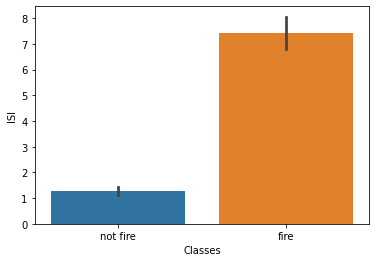

In [83]:
sns.barplot(data= dataset, x= 'Classes', y= 'ISI')

<AxesSubplot:xlabel='Classes', ylabel='ISI'>

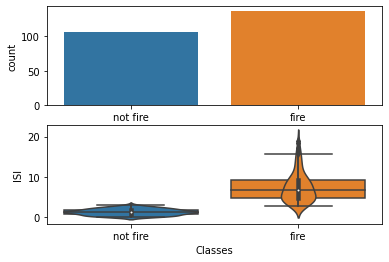

In [84]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = dataset, x = 'Classes', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = dataset, x='Classes', y='ISI' , ax = ax2)
sns.violinplot(data = dataset, x='Classes', y='ISI' , ax = ax2)

<AxesSubplot:xlabel='Classes', ylabel='ISI'>

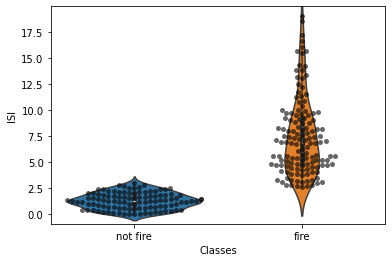

In [85]:
sns.violinplot(data = dataset, x='Classes', y='ISI')
sns.swarmplot(data = dataset, x='Classes', y='ISI', color = 'k', alpha = 0.6)

**ISI is the input key fire prediction the count of fire incidents are higher in the range of 2.5 to 10**

In [86]:
dataset['BUI'].value_counts()

3       5
5.1     4
8.3     3
7.7     3
14.2    3
       ..
67.4    1
62.9    1
59.3    1
57.1    1
4.8     1
Name: BUI, Length: 174, dtype: int64

In [87]:
dataset['BUI'].unique()

array(['3.4', '3.9', '2.7', '1.7', '7', '10.9', '13.5', '10.5', '12.6',
       '15.8', '17.7', '6.7', '4.4', '3', '2.2', '1.6', '2.4', '5.3',
       '5.1', '8.4', '9.7', '11.5', '14.9', '18.3', '21.6', '25.8',
       '29.7', '23.8', '28.3', '2.9', '2.8', '5.7', '9.1', '12.5', '12.1',
       '15.4', '7.4', '5.8', '8.1', '9.2', '11.7', '5.9', '8.3', '11.1',
       '14.2', '18.2', '16.5', '22.4', '21.7', '14.7', '18.5', '23.9',
       '29.4', '32.1', '35', '37.4', '41.2', '4.7', '5.5', '8.2', '17.2',
       '14.1', '17.9', '21.9', '25.5', '20.7', '24.4', '27.2', '22',
       '17.6', '22.9', '27.5', '31.3', '34.7', '38.8', '43.1', '47.5',
       '50.9', '54.7', '57.1', '59.3', '62.9', '67.4', '1.8', '1.1',
       '5.6', '2.6', '3.7', '1.4', '4.2', '7.7', '11.3', '16', '19.2',
       '12.9', '9.6', '6.2', '9', '6.8', '6.5', '9.3', '10.7', '7.3',
       '13.1', '18', '21.2', '6.1', '7.1', '4.1', '3.8', '9.9', '12.7',
       '16.4', '20.8', '27.1', '17.8', '3.3', '7.8', '10.3', '18.7',
      

In [88]:
dataset['BUI'] = dataset['BUI'].astype(float)

In [89]:
pd.DataFrame(dataset['Classes'].groupby(dataset['BUI']).value_counts())

,,Classes
BUI,Classes,
1.1,not fire,1
1.4,not fire,2
1.6,not fire,2
1.7,not fire,2
1.8,not fire,2
...,...,...
59.5,fire,1
62.9,fire,1
64.0,fire,1


<AxesSubplot:xlabel='Classes', ylabel='BUI'>

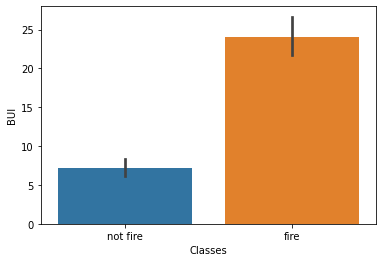

In [90]:
sns.barplot(data= dataset, x= 'Classes', y= 'BUI')

<AxesSubplot:xlabel='Classes', ylabel='BUI'>

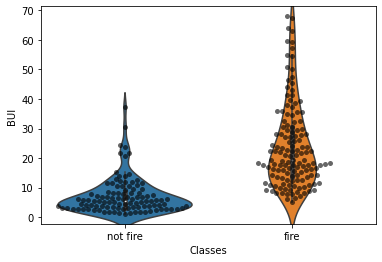

In [91]:
sns.violinplot(data = dataset, x='Classes', y='BUI')
sns.swarmplot(data = dataset, x='Classes', y='BUI', color = 'k', alpha = 0.6)

**BUI: It combines the current DMC and DC to produce an estimate of potential heat release in heavier fuels**

#### Analysing FWI and cleaning it's data

In [92]:
dataset['FWI'].value_counts()

0.4    12
0.8    10
0.5     9
0.1     9
0       9
       ..
7.5     1
8.3     1
9.7     1
8.4     1
6.5     1
Name: FWI, Length: 127, dtype: int64

In [93]:
dataset['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5',

In [94]:
dataset.loc[dataset['FWI'] == 'fire   ']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,fire,NaN,Sidi-Bel Abbes


#### taking care of index 165

In [95]:
# in row number 165 the NaN value is present and FWI has that value so it cloud be replaced by it
dataset['Classes'].fillna(value='fire', inplace= True)

In [96]:
dataset.iloc[160:170]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
160,9,7,2012,36,43,15,1.9,82.3,9.4,9.90,3.2,9.0,3.1,fire,Sidi-Bel Abbes
161,10,7,2012,34,51,16,3.8,77.5,8.0,9.50,2.0,7.7,1.3,not fire,Sidi-Bel Abbes
162,11,7,2012,34,56,15,2.9,74.8,7.1,9.50,1.6,6.8,0.8,not fire,Sidi-Bel Abbes
163,12,7,2012,36,44,13,0.0,90.1,12.6,19.40,8.3,12.5,9.6,fire,Sidi-Bel Abbes
164,13,7,2012,39,45,13,0.6,85.2,11.3,10.40,4.2,10.9,4.7,fire,Sidi-Bel Abbes
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,fire,fire,Sidi-Bel Abbes
166,15,7,2012,34,45,17,0.0,90.5,18.0,24.10,10.9,17.7,14.1,fire,Sidi-Bel Abbes
167,16,7,2012,31,83,17,0.0,84.5,19.4,33.10,4.7,19.2,7.3,fire,Sidi-Bel Abbes
168,17,7,2012,32,81,17,0.0,84.6,21.1,42.30,4.7,20.9,7.7,fire,Sidi-Bel Abbes
169,18,7,2012,33,68,15,0.0,86.1,23.9,51.60,5.2,23.9,9.1,fire,Sidi-Bel Abbes


In [97]:
import math
def FWIcalc(isi,bui):
    if bui <= 80.0:
        bb = 0.1 * isi * (0.626*bui**0.809 + 2.0)
    else:
        bb = 0.1*isi*(1000.0/(25. + 108.64/math.exp(0.023*bui)))
    if(bb <= 1.0):
        fwi = bb
    else:
        fwi = math.exp(2.72 *  (0.434*math.log(bb))**0.647)   
    return fwi

In [98]:
dataset['FWI'].replace('fire   ',format(FWIcalc(isi = 12.5, bui = 10.4),".1f"), inplace= True)

In [99]:
dataset.iloc[165]

day                        14
month                       7
year                     2012
Temperature                37
RH                         37
Ws                         18
Rain                      0.2
FFMC                     88.9
DMC                      12.9
DC                      14.69
ISI                      12.5
BUI                      10.4
FWI                      12.4
Classes                  fire
region         Sidi-Bel Abbes
Name: 165, dtype: object

In [100]:
dataset['FWI'] = dataset['FWI'].astype(float)

In [101]:
pd.DataFrame(dataset['Classes'].groupby(dataset['FWI']).value_counts())

,,Classes
FWI,Classes,
0.0,not fire,9
0.1,not fire,9
0.2,not fire,6
0.3,not fire,8
0.4,not fire,12
...,...,...
26.9,fire,1
30.0,fire,1
30.2,fire,1


<AxesSubplot:xlabel='Classes', ylabel='FWI'>

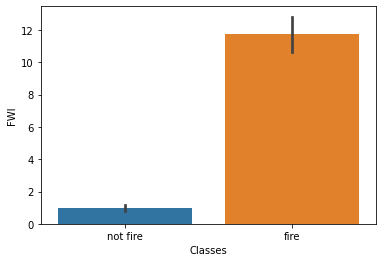

In [102]:
sns.barplot(data= dataset, x= 'Classes', y= 'FWI')

<AxesSubplot:xlabel='Classes', ylabel='FWI'>

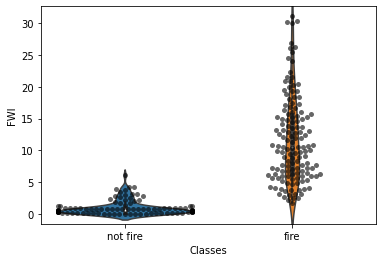

In [103]:
sns.violinplot(data = dataset, x='Classes', y='FWI')
sns.swarmplot(data = dataset, x='Classes', y='FWI', color = 'k', alpha = 0.6)

<AxesSubplot:xlabel='Classes', ylabel='FWI'>

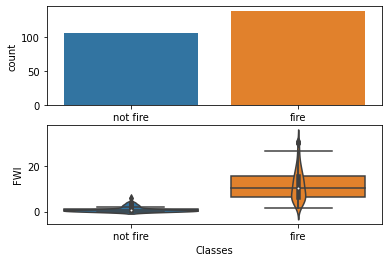

In [104]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = dataset, x = 'Classes', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = dataset, x='Classes', y='FWI' , ax = ax2)
sns.violinplot(data = dataset, x='Classes', y='FWI' , ax = ax2)

**FWI is a key indicator of extreme fire behavior potential. And it integrates current ISI and BUI to produce a unitless index of general fire intensity potential. from the data the fire has more count and in between 5 to 15 more fire incidents occured**

##### Analysing region column

In [105]:
dataset['region'].value_counts()

bejaia            122
Sidi-Bel Abbes    122
Name: region, dtype: int64

In [106]:
pd.DataFrame(dataset['Classes'].groupby(dataset['region']).value_counts())

Classes
region         Classes          
Sidi-Bel Abbes fire           79
               not fire       43
bejaia         not fire       63
               fire           59

<AxesSubplot:xlabel='Classes', ylabel='count'>

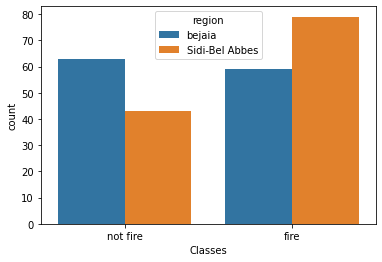

In [107]:
sns.countplot(data = dataset, x = 'Classes', hue='region')

**By observing the data Sidi-Bel Abbes has more fire incidents and Bejaia has less fire place**

###### Fuel Moisture Codes vs Fire Behavior Indices

<AxesSubplot:>

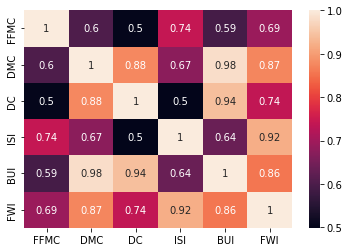

In [108]:
sns.heatmap(dataset[['FFMC', 'DMC', 'DC','ISI', 'BUI', 'FWI']].corr(), annot= True)

<AxesSubplot:>

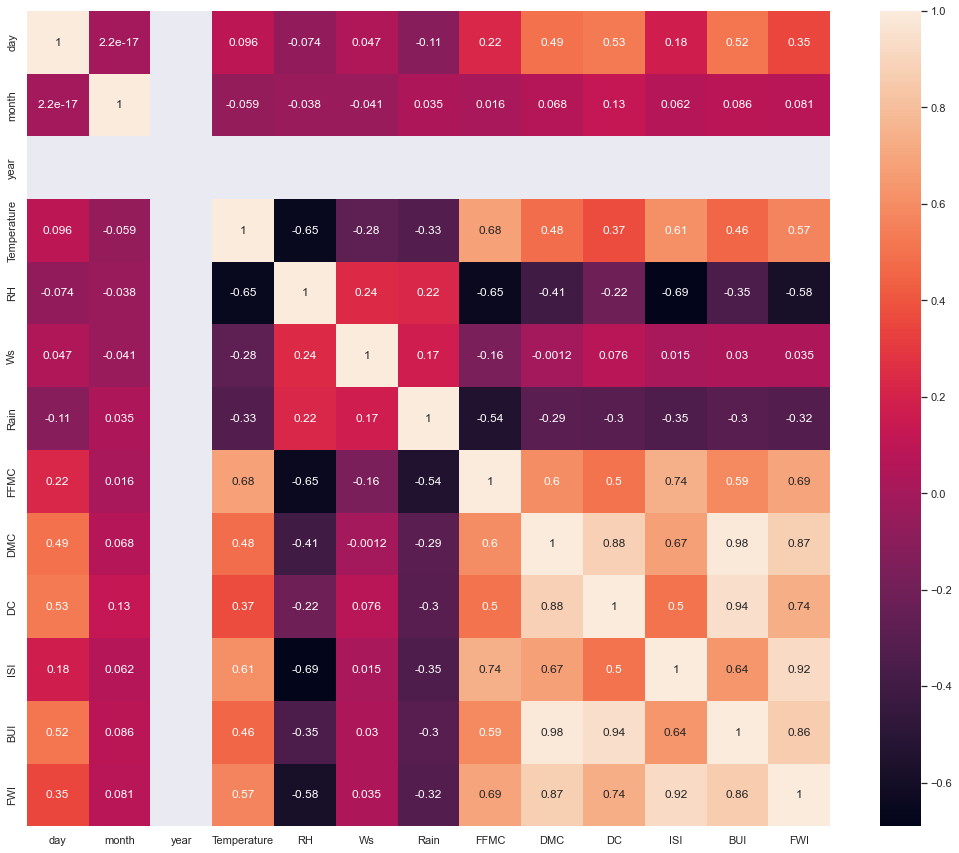

In [109]:
sns.set(rc={'figure.figsize':(18,15)})
sns.heatmap(dataset.corr(), annot=True)

In [110]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288484,47.619393,6.9,13.275,33.10,68.150,220.4


In [111]:
date = pd.to_datetime(dataset[['day','month','year']])
bejaia_data = dataset[['FFMC','DMC','DC']][:122]
Sidi_Bel_Abbes = dataset[['FFMC','DMC','DC']][123:]

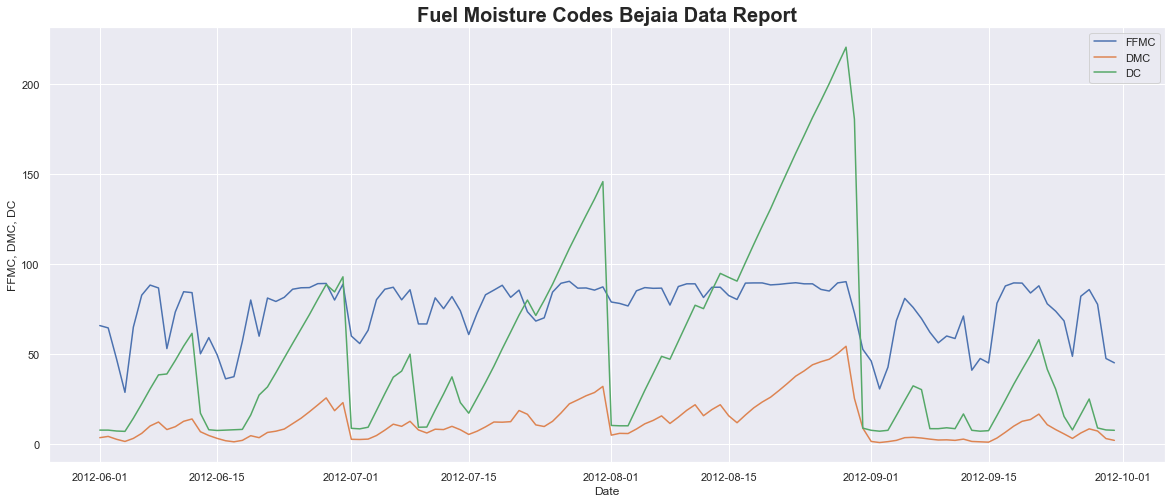

In [112]:
plt.figure(figsize=(20,8))
plt.plot_date(date[:122],bejaia_data, linestyle='solid', marker='None')
plt.title('Fuel Moisture Codes Bejaia Data Report',fontweight="bold",fontsize=20, loc='center')
plt.legend(['FFMC','DMC','DC'])
plt.ylabel('FFMC, DMC, DC')
plt.xlabel('Date')
plt.savefig('Fuel Moisture Codes Bejaia Data Report.png')

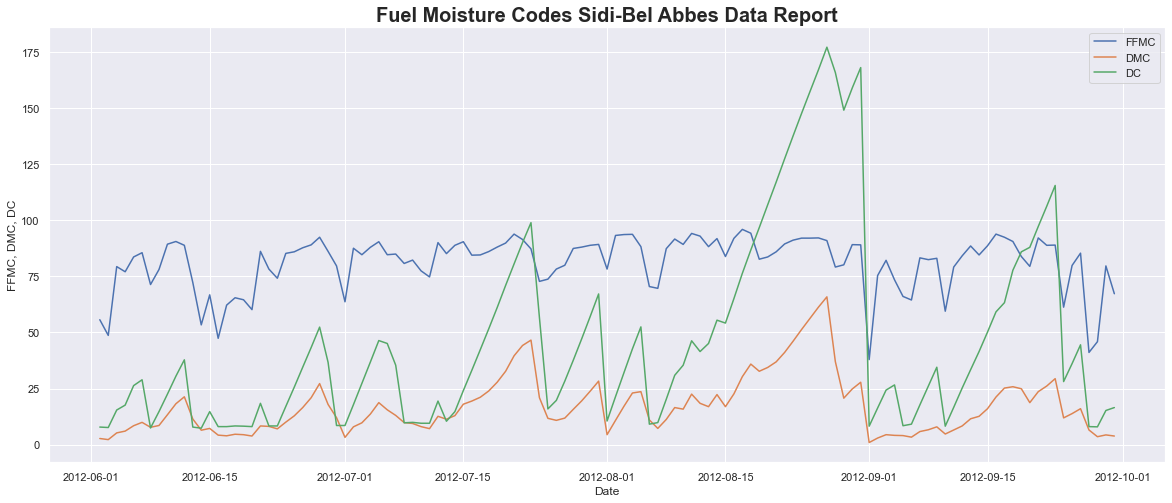

In [113]:
plt.figure(figsize=(20,8))
plt.plot_date(date[123:],Sidi_Bel_Abbes, linestyle='solid', marker='None')
plt.title('Fuel Moisture Codes Sidi-Bel Abbes Data Report',fontweight="bold",fontsize=20, loc='center')
plt.legend(['FFMC','DMC','DC'])
plt.ylabel('FFMC, DMC, DC')
plt.xlabel('Date')
plt.savefig('Fuel Moisture Codes Sidi-Bel Abbes Data Report.png')

In [114]:
bejaia_data1 = dataset[['ISI', 'BUI', 'FWI']][:122]
Sidi_Bel_Abbes1 = dataset[['ISI', 'BUI', 'FWI']][123:]

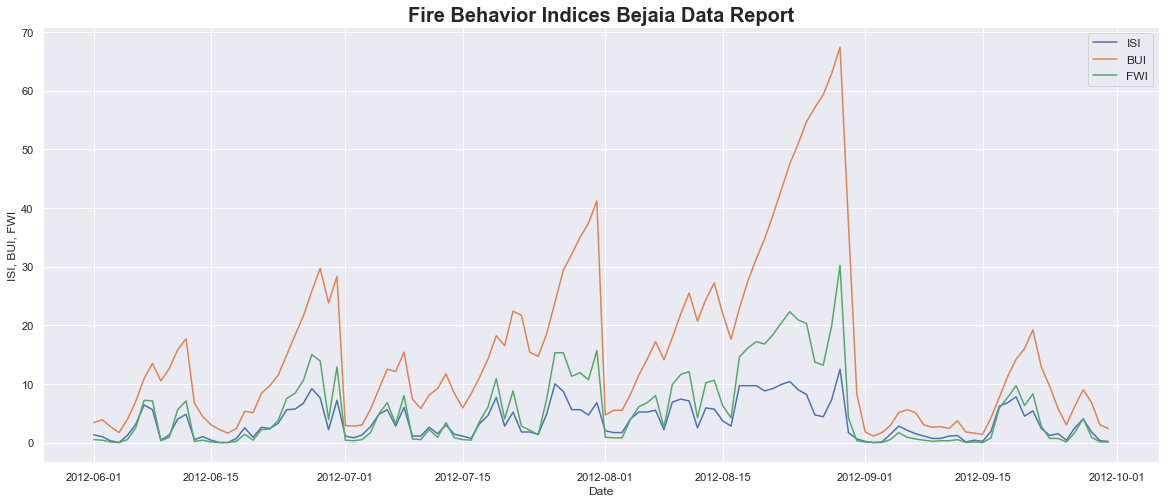

In [115]:
plt.figure(figsize=(20,8))
plt.plot_date(date[:122],bejaia_data1, linestyle='solid', marker='None')
plt.title('Fire Behavior Indices Bejaia Data Report',fontweight="bold",fontsize=20, loc='center')
plt.legend(['ISI', 'BUI', 'FWI'],fontsize=12)
plt.ylabel('ISI, BUI, FWI',fontsize=12)
plt.xlabel('Date')
plt.savefig('Fire Behavior Indices Bejaia Data Report.png')

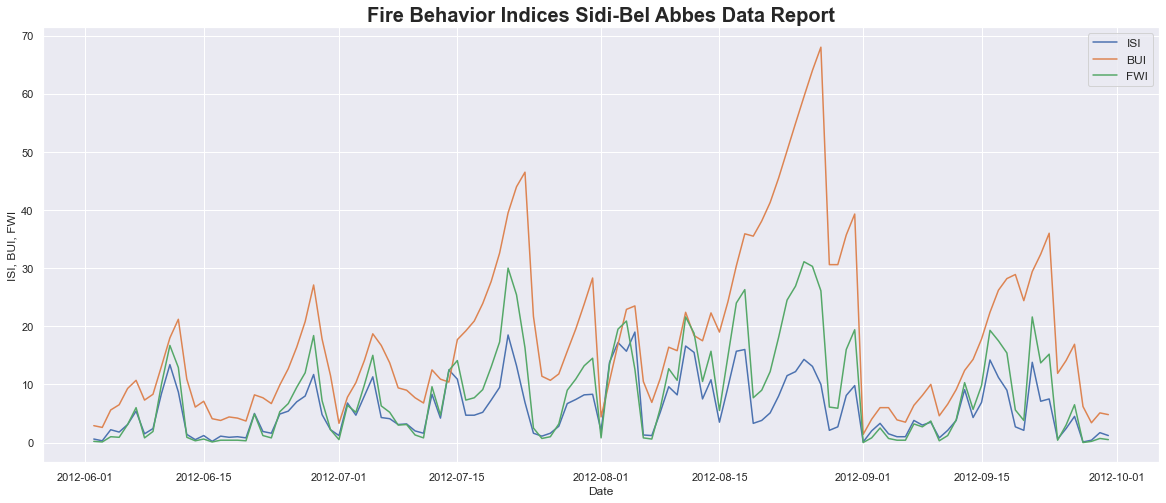

In [116]:
plt.figure(figsize=(20,8))
plt.plot_date(date[123:],Sidi_Bel_Abbes1, linestyle='solid', marker='None')
plt.title('Fire Behavior Indices Sidi-Bel Abbes Data Report',fontweight="bold",fontsize=20, loc='center')
plt.legend(['ISI', 'BUI', 'FWI'],fontsize=12)
plt.ylabel('ISI, BUI, FWI',fontsize=12)
plt.xlabel('Date')
plt.savefig('Fire Behavior Indices Sidi-Bel Abbes Data Report.png')

**By observing the above time lines the Fire Behavior Indices and Fuel Moisture Codes are very high in August to September month when the Fuel Moisture Codes are that time fire occured the both indexes are very correlated to each other**

#### Feature Engineering for Classes and region

In [117]:
# Unique values in the classes
dataset['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [118]:
# mapping the values
dataset['Classes'] = dataset['Classes'].map({'not fire': 0, 'fire':1})

In [119]:
dataset['Classes'].unique()

array([0, 1], dtype=int64)

In [120]:
# Unique values in the region
dataset['region'].unique()

array(['bejaia', 'Sidi-Bel Abbes'], dtype=object)

In [121]:
# mapping the values
dataset['region'] = dataset['region'].map({'bejaia': 0, 'Sidi-Bel Abbes':1})

In [122]:
dataset['region'].unique()

array([0, 1], dtype=int64)

#### Cleaned dataset

In [123]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [124]:
dataset.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


**In the above data if we doesnot need year column because it's have all the same data or combine all day month and year column**

In [125]:
dataset_with_date = dataset.copy()

In [126]:
dataset_with_date['Date'] = pd.to_datetime(dataset_with_date[['day','month','year']])

In [127]:
dataset_with_date.drop(['day','month','year'], axis= 1, inplace=True)

In [128]:
dataset_with_date.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,Date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,2012-06-05


In [129]:
dataset_with_date.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,Date
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1,2012-09-26
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1,2012-09-27
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1,2012-09-28
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1,2012-09-29
243,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1,2012-09-30


In [130]:
# https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system